# 4. Feature Engineering – Data Understanding und Data Preparation
## Anforderungen an Projektumsetzung: Feature Engineering
---
- Erstellen Sie mindestens 2 neue Features
- Untersuchen Sie die Korrelationen gesamthaft und graphisch für mindestens 2 Feature-Kombinationen
- Erstellen/Konvertieren Sie eine Time Series
- Erstellen Sie eine Analyse basierend auf den Zeitdaten

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

apps = pd.read_csv("Daten/Google-Playstore.csv")

---
**AUFGABE:**

Erstellen Sie mindestens 2 neue Features.

In [2]:
# Feature 1: Rating Binning - Erstellen von skalaren Kategorien
apps['Rating_bins'] = pd.cut(apps.Rating, [0.0, 0.99, 2.0, 3.0, 4.0, 5.0], include_lowest=True)
apps.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Rating_bins
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]"
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,"(4.0, 5.0]"
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]"
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,"(4.0, 5.0]"
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]"


In [3]:
# Feature 2: One-Hot-Encoding von einem Feature mit boolean-Werten, 
# um diese evtl. für eine spätere Analyse verwenden zu können, 
# die numerische Werte erfordert
pd.get_dummies(apps['Ad Supported']).head()

,False,True
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [4]:
pd.get_dummies(apps['Rating_bins']).head()

,"(-0.001, 0.99]","(0.99, 2.0]","(2.0, 3.0]","(3.0, 4.0]","(4.0, 5.0]"
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0


In [5]:
apps['Price_bins'] = pd.cut(apps['Price'], [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 200.0, 300.0, 400.0], include_lowest=True)
apps.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Rating_bins,Price_bins
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]","(-0.001, 10.0]"
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,"(4.0, 5.0]","(-0.001, 10.0]"
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]","(-0.001, 10.0]"
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,"(4.0, 5.0]","(-0.001, 10.0]"
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]","(-0.001, 10.0]"


---
**AUFGABE:**

Untersuchen Sie die Korrelationen gesamthaft und graphisch für mindestens 2 Feature-Kombinationen.

In [6]:
# Verwerende Daten aus Abschnitt 2.) Datenexploration
apps_in_kb = apps.copy()
apps_in_kb = apps[apps.Size.str.contains('k', na=False)].copy()
apps_in_kb["Size"]

apps_in_kb["Size"] = apps_in_kb["Size"].str.replace("k", "")
apps_in_kb["Size"] = apps_in_kb["Size"].str.replace(",", "")
apps_in_kb["Size"]= pd.to_numeric(apps_in_kb["Size"], errors='raise')
apps_in_kb["Size"] = apps_in_kb["Size"] / 1000.0
apps_in_kb["Size"]

apps_in_mb = apps.copy()
apps_in_mb = apps_in_mb[apps_in_mb.Size.str.contains('M', na=False)].copy()
apps_in_mb["Size"] = apps_in_mb["Size"].str.replace("M", "")
apps_in_mb["Size"] = apps_in_mb["Size"].str.replace(",", "")
apps_in_mb["Size"]= pd.to_numeric(apps_in_mb["Size"], errors='raise')

apps_varies = apps.copy()
apps_varies = apps_varies[apps_varies.Size.str.contains('Varies with device', na=False)].copy()
apps_varies["Size"] = apps_varies["Size"].str.replace("Varies with device", "0.0")
apps_varies["Size"]= pd.to_numeric(apps_varies["Size"], errors='raise')

apps_concated = pd.concat([apps_in_kb, apps_in_mb, apps_varies], ignore_index = False )
apps_concated.Size  # NaN Werte nicht enthalten
apps_concated = pd.concat([apps_in_kb, apps_in_mb, apps_varies], ignore_index = False )
apps_concated.Size  # NaN Werte nicht enthalten

size = apps_concated.Size

# Verwende Daten aus Abschnitt 3.) Datentransformation

apps = apps.drop(columns=['Size']).reset_index().merge(size, left_index=True, right_index=True)
apps.head()

,index,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Rating_bins,Price_bins,Size
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,...,"Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]","(-0.001, 10.0]",10.0
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,...,"May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,"(4.0, 5.0]","(-0.001, 10.0]",2.9
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,...,"Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]","(-0.001, 10.0]",3.7
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,...,"Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,"(4.0, 5.0]","(-0.001, 10.0]",1.8
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,...,"Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]","(-0.001, 10.0]",6.2


In [7]:
# Hier werden nur Features in Korrelation gesetzt, 
# die rein numersche Werte besitzen
apps.corr()

,index,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice,Size
index,1.000000,-0.000597,0.000179,0.001141,0.001067,0.000768,0.000415,-0.000791,-0.000635,0.000317,0.000191
Rating,-0.000597,1.000000,0.013030,0.011212,0.012612,-0.010748,-0.003688,0.160505,0.153810,0.019463,0.046177
Rating Count,0.000179,0.013030,1.000000,0.545278,0.547573,0.001409,-0.000410,0.005287,0.025706,0.137222,0.013239
Minimum Installs,0.001141,0.011212,0.545278,1.000000,0.954037,0.001622,-0.000460,0.002247,0.014169,0.059914,0.004124
Maximum Installs,0.001067,0.012612,0.547573,0.954037,1.000000,0.001815,-0.000515,0.002879,0.016093,0.064216,0.005009
Free,0.000768,-0.010748,0.001409,0.001622,0.001815,1.000000,-0.278777,0.123626,0.008689,-0.003167,-0.003471
Price,0.000415,-0.003688,-0.000410,-0.000460,-0.000515,-0.278777,1.000000,-0.034269,-0.002668,0.000506,0.003530
Ad Supported,-0.000791,0.160505,0.005287,0.002247,0.002879,0.123626,-0.034269,1.000000,0.138316,0.005708,-0.042874
In App Purchases,-0.000635,0.153810,0.025706,0.014169,0.016093,0.008689,-0.002668,0.138316,1.000000,0.045984,0.165520
Editors Choice,0.000317,0.019463,0.137222,0.059914,0.064216,-0.003167,0.000506,0.005708,0.045984,1.000000,0.038142


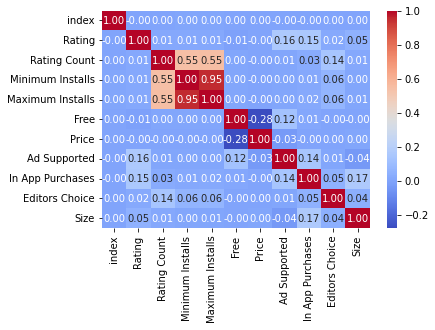

In [8]:
sns.heatmap(apps.corr(), annot = True, fmt='.2f', cmap= 'coolwarm')
plt.show()

- Wie man aus der Heatmap entnehmen kann, korrelieren kaum Features miteinander
- Daher macht eine weitere Korrelationsanalyse für die folgenden Features weniger Sinn

In [9]:
two_bins = apps.pivot_table(index='Rating_bins', columns='Price_bins', values='App Id', aggfunc='count', fill_value=0)
two_bins

Price_bins,"(-0.001, 10.0]","(10.0, 20.0]","(20.0, 30.0]","(30.0, 40.0]","(40.0, 50.0]","(50.0, 60.0]","(60.0, 70.0]","(70.0, 80.0]","(80.0, 90.0]","(90.0, 100.0]","(100.0, 200.0]","(200.0, 300.0]","(300.0, 400.0]"
Rating_bins,,,,,,,,,,,,,
"(-0.001, 0.99]",1058332,553,299,126,132,60,35,27,19,41,61,34,42
"(0.99, 2.0]",17131,12,3,0,0,0,1,0,0,1,0,0,0
"(2.0, 3.0]",86387,67,18,3,2,2,0,0,0,1,1,0,0
"(3.0, 4.0]",375908,265,90,37,16,9,9,5,0,2,8,1,5
"(4.0, 5.0]",749356,583,175,52,33,23,21,13,4,11,19,6,7


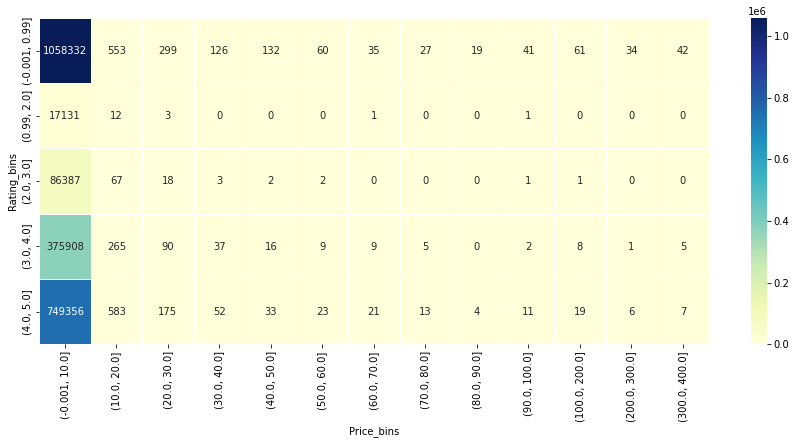

In [10]:
# Erstellen der Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(two_bins, annot=True, fmt='d', linewidths=.5,cmap="YlGnBu")
plt.show()

---
**AUFGABE:**

Erstellen/Konvertieren Sie eine Time Series.

In [13]:
# `Released`-Spalte in Datetime-Format umwandeln 
apps['Released']      = pd.to_datetime(apps['Released'], format='%b %d, %Y')
apps['Last Updated']  = pd.to_datetime(apps['Last Updated'], format='%b %d, %Y')
apps['Released Year'] = pd.DatetimeIndex(apps['Released']).year
apps.head()

,index,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Rating_bins,Price_bins,Size,Released Year
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,...,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]","(-0.001, 10.0]",10.0,2020.0
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,...,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,"(4.0, 5.0]","(-0.001, 10.0]",2.9,2020.0
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,...,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]","(-0.001, 10.0]",3.7,2019.0
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,...,Everyone,NaN,True,False,False,2021-06-15 20:19:35,"(4.0, 5.0]","(-0.001, 10.0]",1.8,2018.0
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,...,Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,"(-0.001, 0.99]","(-0.001, 10.0]",6.2,2020.0


---
**AUFGABE:**

Erstellen Sie eine Analyse basierend auf den Zeitdaten.

In [14]:
# Berechne Zeitraum zwischen Release und lezten Update - Rundung auf ganze Tage
delta = (apps['Last Updated'] - apps['Released']).dropna()

# Negative Tage ermitteln
negative_days = delta[delta < '0 days']
i = negative_days.index

# Lösche alle Daten, die negative Tage haben --> Anz: 9881 --> Werden nichts berücksichtigt, weil das Verhältniss zu 2.3 Mio. zu klein ist 
delta.drop(i, inplace=True)
delta

0            0 days
1          350 days
2           10 days
3           33 days
5          361 days
             ...   
2312938    206 days
2312940     16 days
2312941      0 days
2312942   1738 days
2312943     10 days
Length: 2231998, dtype: timedelta64[ns]

In [16]:
# Wie viele Apps gibt es in den delta-Tages-Kategorien
delta.value_counts()

0 days       475241
1 days       157354
2 days        16877
4 days        14827
3 days        14613
              ...  
4145 days         1
4100 days         1
3951 days         1
4062 days         1
4036 days         1
Length: 4110, dtype: int64

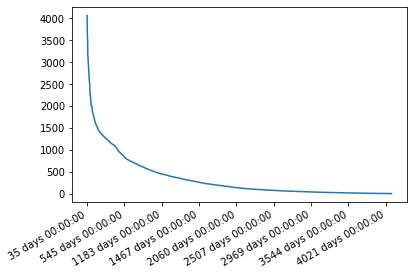

In [17]:
# Plotten der Werteverteilung von Apps, die nach 30 Tagen ein Update nach dem Release getätigt haben
delta[delta >= pd.Timedelta(30, 'D')].value_counts().plot()
plt.show()

- Die Wahrscheinlichkeit, dass 30 Tage nach dem Release ein Update getätig wird, wird immer kleiner